### Normal PDF
Draw 100,000 samples from a Normal distribution that has a mean of 20 and a standard deviation of 1. Do the same for Normal distributions with standard deviations of 3 and 10, each still with a mean of 20.
Plot a histograms of each of the samples; for each, use 100 bins.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

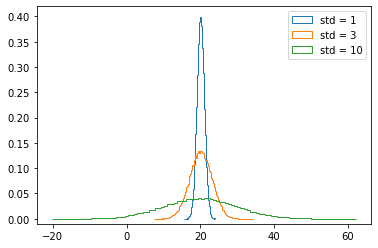

In [5]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1=np.random.normal(20,1,size=100000)
samples_std3=np.random.normal(20,3,size=100000)
samples_std10=np.random.normal(20,10,size=100000)

# Make histograms
_=plt.hist(samples_std1,density=True,histtype='step',bins=100)
_=plt.hist(samples_std3,density=True,histtype='step',bins=100)
_=plt.hist(samples_std10,density=True,histtype='step',bins=100)


# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()


#### Plot CDF

In [6]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x= np.sort(data)

    # y-data for the ECDF: y
    y= np.arange(1, n+1) / n

    return x, y

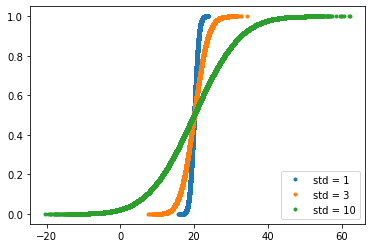

In [7]:
# Generate CDFs
x_std1,y_std1=ecdf(samples_std1)
x_std3,y_std3=ecdf(samples_std3)
x_std10,y_std10=ecdf(samples_std10)

# Plot CDFs
_=plt.plot(x_std1,y_std1,marker='.',linestyle='none')
_=plt.plot(x_std3,y_std3,marker='.',linestyle='none')
_=plt.plot(x_std10,y_std10,marker='.',linestyle='none')

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()


The CDFs all pass through the mean at the 50th percentile; the mean and median of a Normal distribution are equal. The width of the CDF varies with the standard deviation.

### Are the Belmont Stakes results Normally distributed?
Since 1926, the Belmont Stakes is a 1.5 mile-long race of 3-year old thoroughbred horses. Secretariat ran the fastest Belmont Stakes in history in 1973. While that was the fastest year, 1970 was the slowest because of unusually wet and sloppy conditions. With these two outliers removed from the data set, compute the mean and standard deviation of the Belmont winners' times. Sample out of a Normal distribution with this mean and standard deviation using the np.random.normal() function and plot a CDF. Overlay the ECDF from the winning Belmont times. Are these close to Normally distributed?

In [ ]:
# Compute mean and standard deviation: mu, sigma
mu=np.mean(belmont_no_outliers)
sigma=np.std(belmont_no_outliers)

# Sample out of a normal distribution with this mu and sigma: samples
samples=np.random.normal(mu,sigma,10000)

# Get the CDF of the samples and of the data
x_theor,y_theor=ecdf(samples)
x,y=ecdf(belmont_no_outliers)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor, marker='.', linestyle='none')
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()


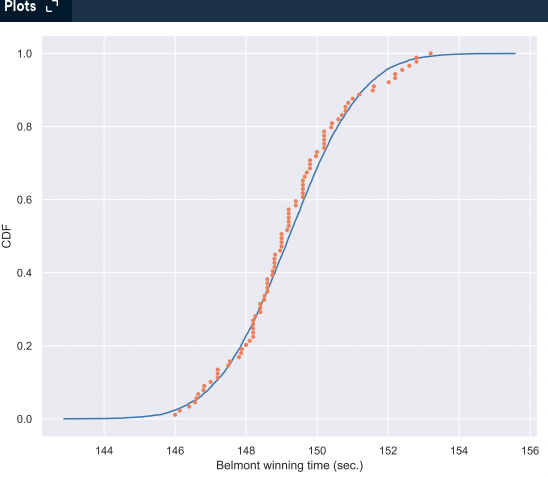

What are the chances of a horse matching or beating Secretariat's record?

Assume that the Belmont winners' times are Normally distributed (with the 1970 and 1973 years removed), what is the probability that the winner of a given Belmont Stakes will run it as fast or faster than Secretariat?

In [ ]:
# Take a million samples out of the Normal distribution: samples
samples=np.random.normal(mu,sigma,1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob=np.sum(samples<144)/1000000

# Print the result
print('Probability of besting Secretariat:', prob)

what is the total waiting time for the arrival of two different Poisson processes in succession? The total waiting time is the time waited for the no-hitter, plus the time waited for the hitting the cycle.

In [21]:
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size)

    return t1 + t2

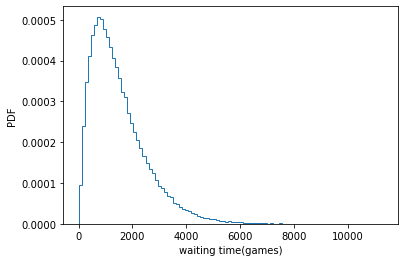

In [23]:
# Draw samples of waiting times: waiting_times
waiting_times=successive_poisson(764,715,100000)

# Make the histogram
_=plt.hist(waiting_times,bins=100,density=True,histtype='step')


# Label axes
_=plt.xlabel("waiting time(games)")
_=plt.ylabel("PDF")

# Show the plot
plt.show()

Notice that the PDF is peaked, unlike the waiting time for a single Poisson process. 

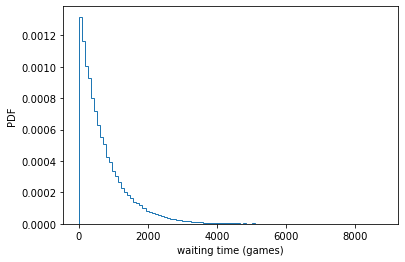

In [25]:
#a single Poisson process
# Draw samples of waiting times: waiting_times
waiting_times=np.random.exponential(715,100000)

# Make the histogram
_=plt.hist(waiting_times,bins=100,density=True,histtype='step')


# Label axes
_=plt.xlabel("waiting time (games)")
_=plt.ylabel("PDF")

# Show the plot
plt.show()

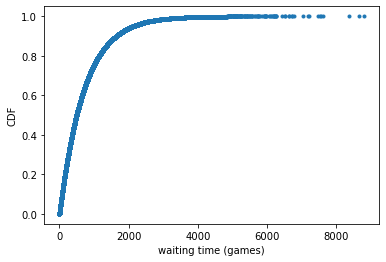

In [26]:
x_w,y_w=ecdf(waiting_times)
_ = plt.plot(x_w, y_w, marker='.', linestyle='none')
_ = plt.xlabel('waiting time (games)')
_ = plt.ylabel('CDF')
plt.show()